### Taller Introducción a la Teoría de la Computación  # 1

#### Jimmy Alexander Pulido Arias


- *Considere el problema de determinar si un código corresponde a un ISBN de 13 dígitos. Construya un autómata finito determinístico para identificar si un código es válido o no. Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. Implemente el autómata correspondiente utilizado una clase autómata. (4 Puntos)*

**Solución:**

    Sea: 
$$A = (Q,\Sigma,\delta,q_{0},F) $$ 

___
***




- Construya un autómata finito determinístico sobre el alfabeto $\{a,b\} $ la cual acepte todas las cadenas que contengan NO más de dos ocurrencias consecutivas de la misma entrada (Por ejemplo, abba es aceptada y abbba no es aceptada). Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. (2 Puntos)

**Solución:**

   Sea:
   $$A = (Q,\Sigma,\delta,q_{0},F) $$ 
   donde: 
    
   $$Q = \{1,2,3,4,5,6\} $$ $$\Sigma = \{a,b\}$$ $$q_{0} = 1$$  $$F = \{1,2,3,4\}$$
    
   con tabla de transiones: 
    
| $\delta$  | a | b| 
|:--:|:--:|-----:|
|$\rightarrow$**1**|2|5|
|***2**|3|5|
|***3**|6|5|
|***4**|2|6|
|***5**|2|4|
|**6**|6|6|
 




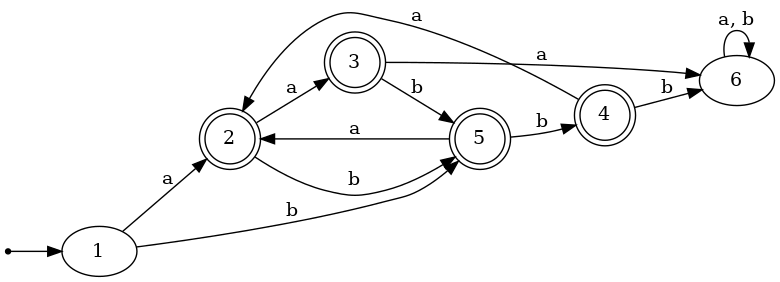

In [11]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 100
G.add_node('start', shape = "point")
G.add_edge('start',1);
final = (2,3,4,5);
G.add_nodes_from(final,shape='doublecircle');
a=([(1,2),(2,3),(3,6),(4,2),(5,2)]);
b=([(1,5),(2,5),(3,5),(4,6),(5,4)]);
ab = [(6,6)];
G.add_edges_from(a,label='a');
G.add_edges_from(b,label='b');
G.add_edges_from(ab,label="a, b");

draw(G)

-----

- Dado un autómata finito determinístico $M$, construya un nuevo autómata finito determinístico $M'$ con el mismo alfabeto de entrada y con la propiedad de que para todos los $u \in \sigma^*$ , $u$ es aceptado por $M'$ si y solo si $u$ NO es aceptado por $M$. (2 Puntos)

**Solución:**
 
Sea  $M = (Q, \Sigma, \delta, q_{0},F)$  un **DFA**, donde el lenguaje de M denotado por: ** $L(M) = \{w\in \Sigma^{*}| \ \hat{\delta}(q_{0},w) \in F \}$ **«Todas las palabras w tal que evaluarlas en la función de transición me retorne a un estado final». 
 
 
Queremos contruir un **DFA** $M' = (Q', \Sigma, \delta' \ q_{0}', F')$ con el mismo alfabeto de $M$, que acepte todas las palabras $w \in \Sigma^* \wedge  w \notin L(M) $. Dicho de otra manera que el lenjuage de M' sea igual a: $L(M') = \ \{ w \ |\ w \in \Sigma^* - L(M) \}$
   
   
Para construirlo miramos dos casos: 

Decimos en principio que $M'$ tendrá los mismos estados que $M$, $$Q' = Q$$  
   
- Sea la palabra $u \in L(M)$ , o  $ \ \hat{\delta}(q_{0},u)\in F$. Entonces queremos que $M'$ no acepte a $u$:
   
    $ \ \hat{\delta'}(q_{0}',u)\notin F'$
    
- Sea la palabra $u \notin L(M)$ , o  $ \ \hat{\delta}(q_{0},u)\notin F$. Entonces queremos que $M'$ sí acepte a $u$:

    $ \ \hat{\delta'}(q_{0}',u)\in F'$
    
De esta manera podemos ver que dada una palabra $u \in \Sigma^*$

- Si  $ \ \hat{\delta}(q_{0},u)\in F$     entonces $ \ \hat{\delta'}(q_{0}',u)\notin F'$

- y Si  $ \ \hat{\delta}(q_{0},u)\notin F$ entonces $ \ \hat{\delta'}(q_{0}',u)\in F'$

Si miramos el conjunto $T = Q - F$ «Conjunto de estados de $M$ , sin estados finales»,  Lo anterior queda muy parecido a: 

- Si  $ \ \hat{\delta}(q_{0},u)\in F$     entonces  $ \ \hat{\delta}(q_{0},u)\notin T$ 

- Si  $ \ \hat{\delta}(q_{0},u)\notin F$     entonces $ \ \hat{\delta}(q_{0},u)\in T$ 


Si tomamos que la función de transición extendida $\hat{\delta'} = \hat{\delta} $ tendríamos: 

- Si  $ \ \hat{\delta}(q_{0},u)\in F$     entonces $ \ \hat{\delta}(q_{0},u)\notin F'$

- y Si  $ \ \hat{\delta}(q_{0},u)\notin F$ entonces $ \ \hat{\delta}(q_{0},u)\in F'$

Entonces por lo anterior se sabría que:

$$F' = T = Q - F $$

Entonces decimos que 
$$ \fbox{ $M' = (Q,\Sigma,\delta, q_{0}, F') \ \ donde \ \ F' = Q - F$ } $$ 

----

 

- Dados dos autómatas finitos determinísticos $M1$ y $M2$ con el mismo alfabeto de entrada, construya  un  tercer  autómata  finito  determinísticos  ($M$) con la propiedad  que $u \in \Sigma$ es  aceptado  por  $M$ si  y solo si es  aceptado  por ambos $M1$  y $M2$. (2 Puntos)

**Solución:**


Tenemos a $ M _{1} = (Q_{1},\Sigma,\delta_{1}, {q_{0}}_{1}, F_{1})$  y a $M_{2} = (Q_{2},\Sigma,\delta_{2}, {q_{0}}_{2}, F_{2})$

y los lenguajes $L(M_{1})$, $L(M_{2})$. Queremos constuir un **DFA** que me acepte el lenguaje obtenido de $L(M_{1})\cap L(M_{2})$.

Entonces Construimos un $M$ desde $M_{1}$ y $M_2$, necesitamos que M «simule» simultaneamente a ambos, aceptanto una palabra $w \in \Sigma^*$ tal que $M1$ y $M2$ lo acepten simultaneamente. Todo lo que necesitamos es recordar el estado en que cada Autómata estaría con cada entrada leída. Entonces necesitamos recordar un **par de estados**, que me indican el estado actual de cada Autómata. 


Construimos entonces: $M = (Q,\Sigma,\delta, q_{0}, F)$ 

1. $Q  = Q_1 \times Q_2$ descrito de otra manera $Q = \{(q_1,q_2)| q_1 \in Q_1 \ y \ q_2 \in Q_2\}$
Producto cartesiano de los conjuntos $Q_1$ y $Q_2$. Q es el conjunto de todos los posibles pares de estados de $Q_1$ y $Q_2$.

2. $\Sigma$ es el mismo alfabeta de $M_1$ y $M_2$.

3. $\delta$, la función de transición se definiría de esta manera, para cada $(q_1,q_2) \in Q $ y cada $\alpha \in \Sigma$, entones: $$ \delta((q_1,q_2),\alpha) = (\delta_1(q_1,\alpha),\delta_2(q_2,\alpha))$$.

4. $q_0$ sería el par de estados $({q_0}_1,{q_0}_2)$.

5. $F$, el conjunto de estados finales sería el conjunto de parejas $(q_1,q_2)$ donde $q_1 \in F_1$ y $q_2 \in F_2$. Lo que sería igual a: $$F = F_1 \times F_2$$



-----


-  Construya un autómata  finito  no determinístico  que permita aceptar  palabras  sobre  el alfabeto ${1,2,3}$ tal que  el último  símbolo aparezca  al menos  dos veces,  pero  sin la intervención de un símbolo superior en la mitad. Por ejemplo, 11, 2112, 123113, 3212113, etc. (2 Puntos)

**Solución:**


Sea $ A = (Q,\Sigma,\delta,q_0,F)$ donde: 

- $$Q = {A,B,C,D,E,F,G}.$$
- $$\Sigma = {1,2,3} $$
- $$q_0 = A$$
- $$F = {E,F,G}$$

La funición $\delta$ de transición está denotada por la siguiente tabla: 

|$\delta$| 1 | 2 | 3 |
|:------:|:--:|:-:|:-:|
|$\rightarrow$**A**| {B} | {C} | {D} |
|**B**| {B,E}|{C} | {D}|
|**C**| {C} | {C,F} | {D} |
|**D**| {D}| {D} |{D,E} |
|***E**|$\emptyset$ |$\emptyset$ |$\emptyset$ |
|***F**| $\emptyset$| $\emptyset$| $\emptyset$|
|***G**|$\emptyset$ |$\emptyset$ |$\emptyset$ |


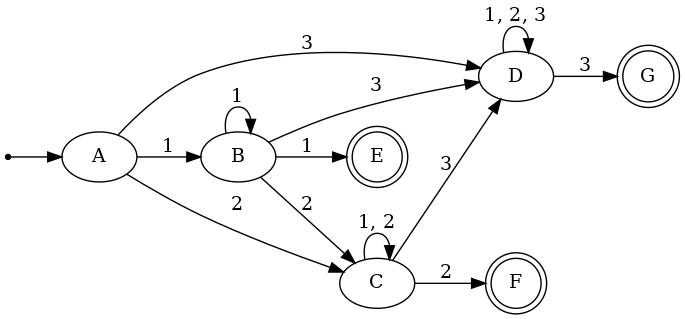

In [14]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 100
G.add_node('start', shape = "point")
G.add_edge('start','A');
final = ('E','F','G');
G.add_nodes_from(final,shape='doublecircle');
a1= [('A','B'),('B','B'),('B','E')]
a2= [('A','C'),('B','C'),('C','F')]
a3= [('A','D'),('B','D'),('C','D'),('D','G')]
a12 = [('C','C')]
a123 = [('D','D')]
G.add_edges_from(a1,label='1');
G.add_edges_from(a2,label='2');
G.add_edges_from(a3,label="3");

G.add_edges_from(a12,label="1, 2");
G.add_edges_from(a123,label="1, 2, 3");
draw(G)

---

- Escriba un autómata que reconozca todos las cadenas sobre {0,1} que representan números binarios que son divisibles por 5. Por ejemplo, 0, 101, 1010, 1111, 11001. (3 Puntos)

**Solución** 

Sabemos que si un número $n$ es divisible por 5,es porque $ (n\mod 5) = 0$. 

Entoces miramos el módulo para los números de 0 al 9:

|#|$\mod 5$|
|:-:|:-:|
|0|0|
|1|1|
|2|2|
|3|3|
|4|4|
|5|0|
|6|1|
|7|2|
|8|3|
|9|4|

Teniendo en cuenta esto, tendríamos realmente solo 5 casos:

>Para hallar el $mod(5)$ de cualquier número, solo nos importa el  Primer dígito (unidades). 

|#|$\mod 5$|
|:-:|:-:|
|0 o 5|0|
|1 o 6|1|
|2 o 7|2|
|3 o 8|3|
|4 o 9|4|



- Ahora, sabemos que si tenemos cualquier número $b$ en sistema binario con valor $n$ en decimal, si le agregamos un $0$ a la derecha que quede esta manera: '$b0$' Esto será igual a $2*n$ en decimal.

- Si hacemos lo mismo pero agregando un 1, '$b1$', esté tendrá un valor en decimal igual a $2*n+1$. 

|n(b)|mod(5)|agregando un 0|mod(5)|agregando un 1|mod(5)|
|:-:|:-:|:-:|:-:|
|0(0) o 5(101)| 0|0(0) o 10(1010)       | 0 |1(1) o 11(1011) |1 |
|1(1) o 6(110)| 1|2(10) o 12(1100)     | 2 |3(11) o 13(1101) | 3|
|2(10) o 7(111)|2|4(100) o 14(1110)    | 4 |5(101) o 15(1111) | 0|
|3(11) o 8(1000)|3|6(110) o 16(10000)  | 1 |7(111) o 17(10001) | 2|
|4(100) o 9(1001)|4|8(1000) o 18(10010)| 3 |9(1001) o 19(10011) | 4|

Ahora tenemos 5 casos, usando la tabla anterior, en los que x es cualquier número binario. 

|Estado|x |Agregando un 0|Agregando un 1 |
|:--------------:|:------------:||
|A|$x$ $mod(5)$ = 0| $x0$ $mod(5)$ = 0| $x1$ $mod(5)$ = 1 |
|B|$x$ $mod(5)$ = 1| $x0$ $mod(5)$ = 2| $x1$ $mod(5)$ = 3 |
|C|$x$ $mod(5)$ = 2| $x0$ $mod(5)$ = 4| $x1$ $mod(5)$ = 0 |
|D|$x$ $mod(5)$ = 3| $x0$ $mod(5)$ = 1| $x1$ $mod(5)$ = 2 |
|E|$x$ $mod(5)$ = 4| $x0$ $mod(5)$ = 3| $x1$ $mod(5)$ = 4 |

La tabla anterior es muy parecida a una tabla de transiciones, entonces si tomamos cada resultado del módulo como un estado y «Agregar un cero» y «Agregar un uno», como carácteres del alfabeto, y además la casilla intersección de cada estado y cada caracter, como el estado al que se transita. Podremos empezar a construir un Autómata: 

Sea $A = (Q,\Sigma,\delta,q_0,F)$ el autómata que acepte todas los números binarios que son divisibles por 5, con:

- $\Sigma = \{1,0\}$.
- $Q = \{A,B,C,D,E\}$ 
- $q_0 = A $
- $F = \{A\}$

Con tabla de transiciones: 

|$\delta$|0|1|
|:-:|:-:|:-:|
|$\rightarrow*$A  | A | B |
|B  | C | D |
|C  | E | A | 
|D  | B | C |
|E  | D | E | 


Con diagrama: 


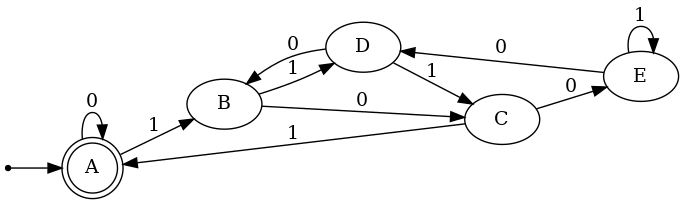

In [13]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 100
G.add_node('start', shape = "point")
G.add_edge('start','A');
final = ('A');
G.add_nodes_from(final,shape='doublecircle');

a0 = [('A','A'),('B','C'),('C','E'),('D','B'),('E','D')]
a1 = [('A','B'),('B','D'),('C','A'),('D','C'),('E','E')]

G.add_edges_from(a1,label='1');
G.add_edges_from(a0,label='0');

draw(G)

---

